In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


# Imports 

In [68]:
import pandas as pd 
from sklearn import * 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [69]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Get Data



In [70]:
train = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


We could join: 
1. Put student in profession 
2. academic and work preassure
3. study and job satisfaction
4. change sleep hours

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

There are categorical values and null values

In [72]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [73]:
# join work 
train["Working Professional or Student"].fillna("Student", inplace=True)
train["Profession"].fillna("Student", inplace=True)

In [74]:
# join pressure 
train["Pressure"] = train["Academic Pressure"].combine_first(train["Work Pressure"])

In [75]:
# join satisfaction
train["Satisfaction"] = train["Study Satisfaction"].combine_first(train["Job Satisfaction"])

In [76]:
# reformat sleep time
train["Sleep Duration"] = train["Sleep Duration"].str.extract(r'(\d+)').astype(float)

In [77]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,8.0,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,5.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,5.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [78]:
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Pressure', 'Satisfaction'],
      dtype='object')

# Visualize 

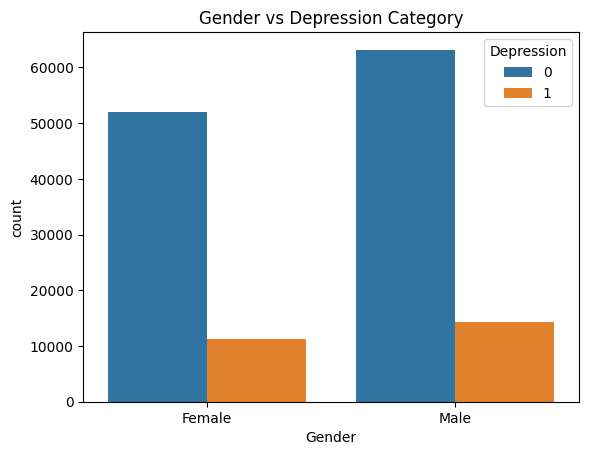

In [79]:
sns.countplot(x='Gender', hue='Depression', data=train)
plt.title('Gender vs Depression Category')
plt.show()

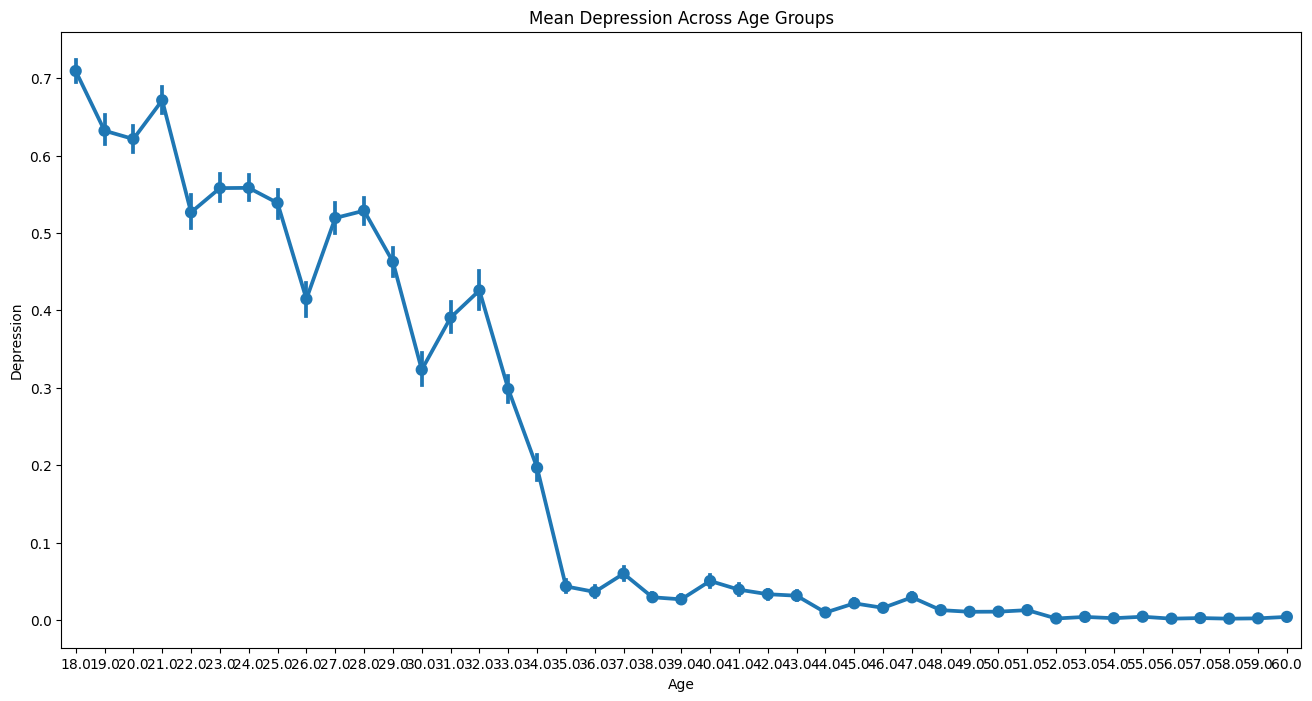

In [80]:
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed

sns.pointplot(x='Age', y='Depression', data=train)
plt.title('Mean Depression Across Age Groups')
plt.show()

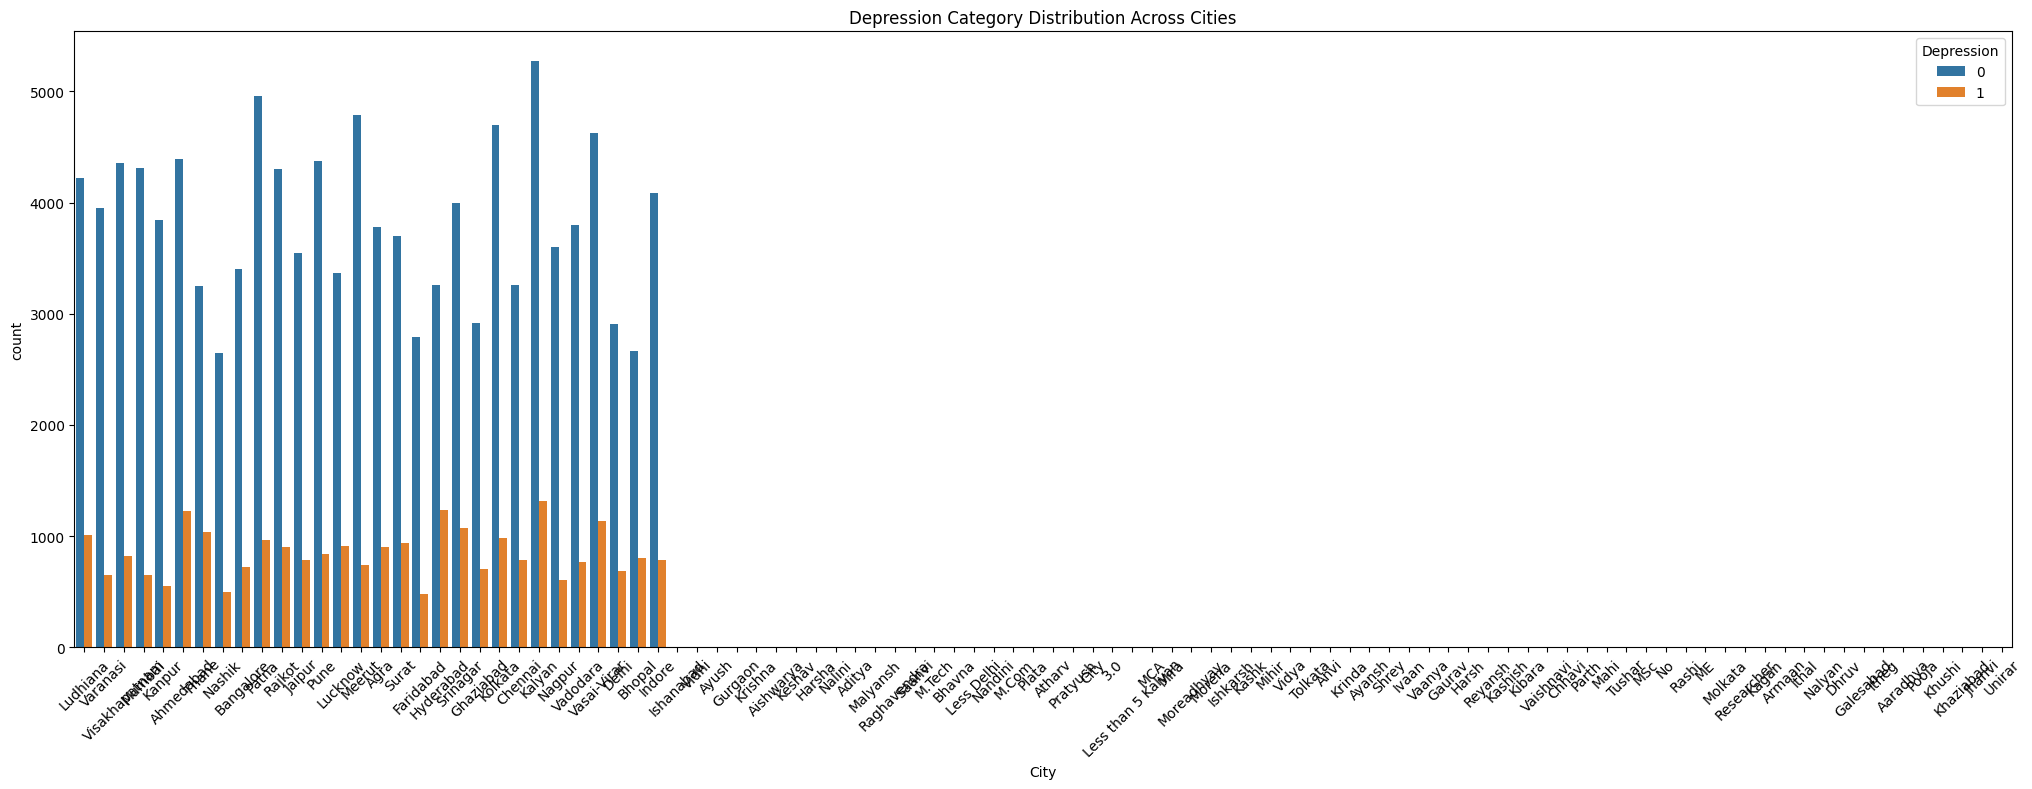

In [81]:
# Set a larger figure size for better readability
plt.figure(figsize=(25, 8))

# Create a count plot to show the distribution of depression categories by city
sns.countplot(x='City', hue='Depression', data=train)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and show the plot
plt.title('Depression Category Distribution Across Cities')
plt.show()


Text(0.5, 1.0, 'Mean Depression Across Working Professional or Student')

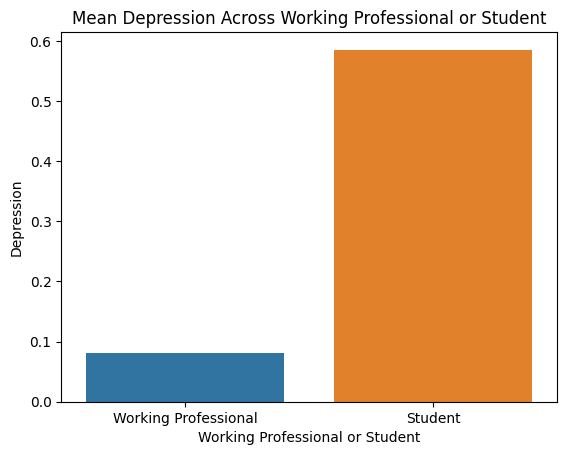

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Working Professional or Student', y='Depression', data=train, ci=None)
plt.title('Mean Depression Across Working Professional or Student')

64


Profession
Moderate                  1.000000
Yogesh                    0.666667
Student                   0.534842
Unemployed                0.333333
Graphic Designer          0.185727
Judge                     0.108645
HR Manager                0.106912
Mechanical Engineer       0.101105
Architect                 0.099085
Financial Analyst         0.083227
Manager                   0.081750
Civil Engineer            0.080952
Data Scientist            0.077824
Lawyer                    0.075045
Educational Consultant    0.074684
Investment Banker         0.071247
Accountant                0.064227
Plumber                   0.064073
Research Analyst          0.062319
Software Engineer         0.061589
Business Analyst          0.056628
Teacher                   0.055649
Doctor                    0.052842
Pilot                     0.051228
Marketing Manager         0.050607
Chef                      0.048567
Sales Executive           0.047154
Consultant                0.047056
Travel Co

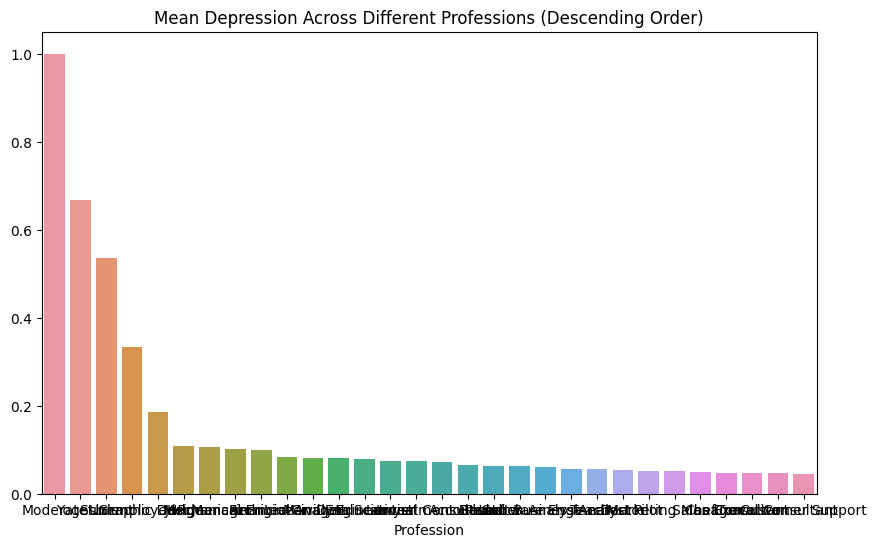

In [83]:
mean_depression = train.groupby('Profession')['Depression'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_30_professions = mean_depression.head(30)
sns.barplot(x=top_30_professions.index, y=top_30_professions.values, ci=None)
plt.title('Mean Depression Across Different Professions (Descending Order)')
print(len(mean_depression))
top_30_professions

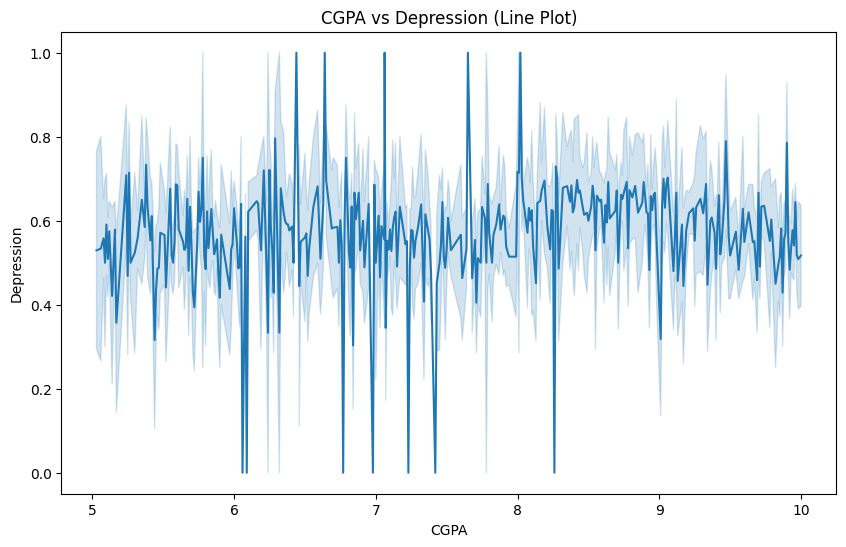

0.02172901738957383


In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='CGPA', y='Depression', data=train)
plt.title('CGPA vs Depression (Line Plot)')
plt.xlabel('CGPA')
plt.ylabel('Depression')

# Show the plot
plt.show()
correlation_cgpa_dep = train['CGPA'].corr(train['Depression'])
print(correlation_cgpa_dep)

In [85]:
# train['Sleep Duration'] = train['Sleep Duration'].astype(int)
# plt.figure(figsize=(12, 8))
# sns.countplot(x='Sleep Duration', hue='Depression', data=train)

# # Add title and labels
# plt.title('Sleep Duration Categories Across Depression Categories')
# plt.xlabel('Sleep Duration')
# plt.ylabel('Count')

# # Show the plot
# plt.show()


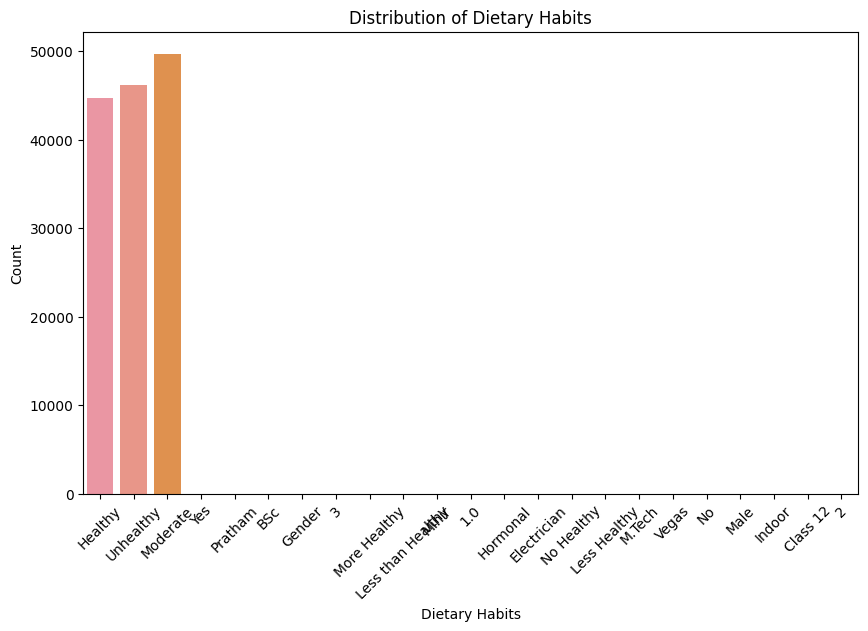

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dietary Habits', data=train)
plt.title('Distribution of Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


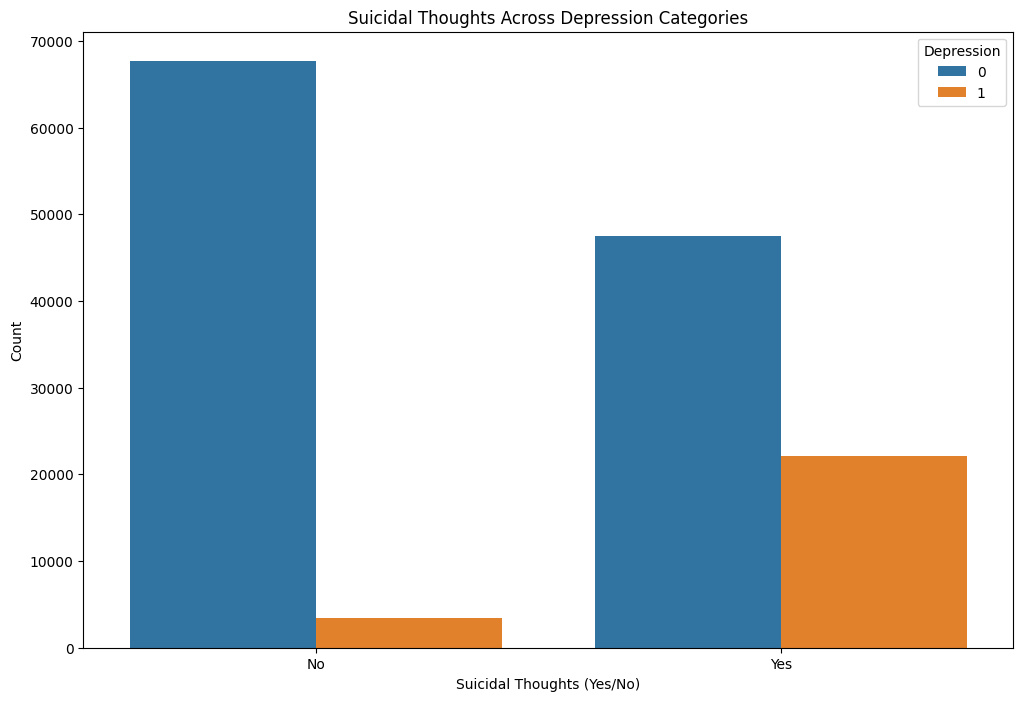

In [87]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=train)
plt.title('Suicidal Thoughts Across Depression Categories')
plt.xlabel('Suicidal Thoughts (Yes/No)')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Work/Study Hours')

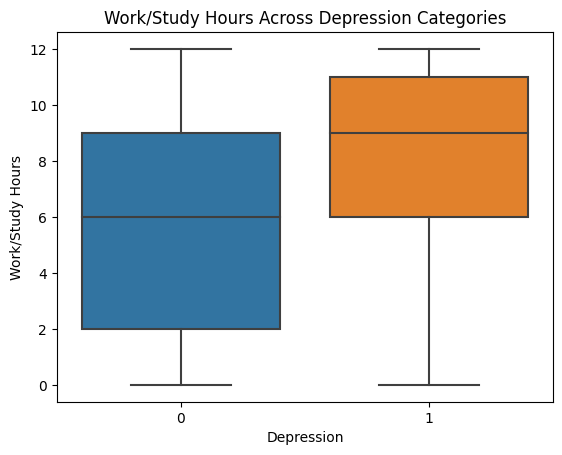

In [88]:
sns.boxplot(x='Depression', y='Work/Study Hours', data=train)
plt.title('Work/Study Hours Across Depression Categories')
plt.xlabel('Depression')
plt.ylabel('Work/Study Hours')

Text(0, 0.5, 'Count')

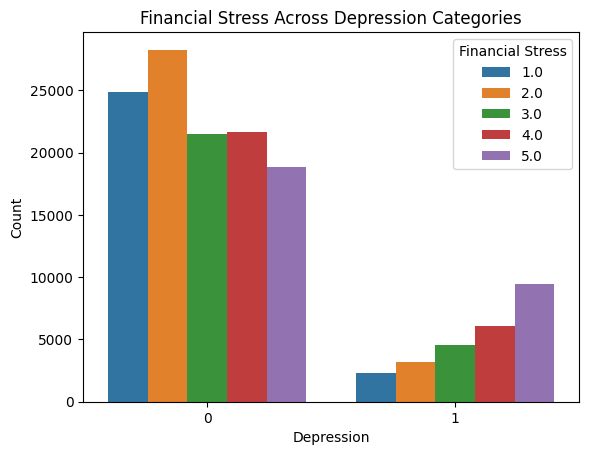

In [89]:
sns.countplot(x='Depression', hue='Financial Stress', data=train)

# Add title and labels
plt.title('Financial Stress Across Depression Categories')
plt.xlabel('Depression')
plt.ylabel('Count')

In [90]:
# sns.countplot(x='Suicidal Thoughts', hue='Family History of Mental Illness', data=train)

# # Add title and labels
# plt.title('Family History of Mental Illness Across Suicidal Thoughts Categories')
# plt.xlabel('Suicidal Thoughts (Yes/No)')
# plt.ylabel('Count')


Text(0, 0.5, 'Depression')

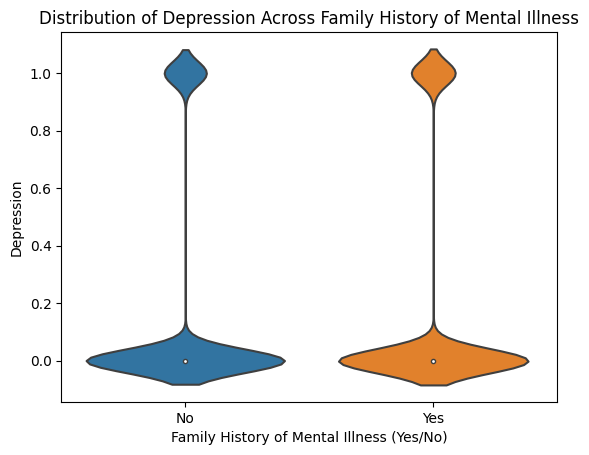

In [91]:
sns.violinplot(x='Family History of Mental Illness', y='Depression', data=train)

# Add title and labels
plt.title('Distribution of Depression Across Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness (Yes/No)')
plt.ylabel('Depression')

Text(0, 0.5, 'Average Depression')

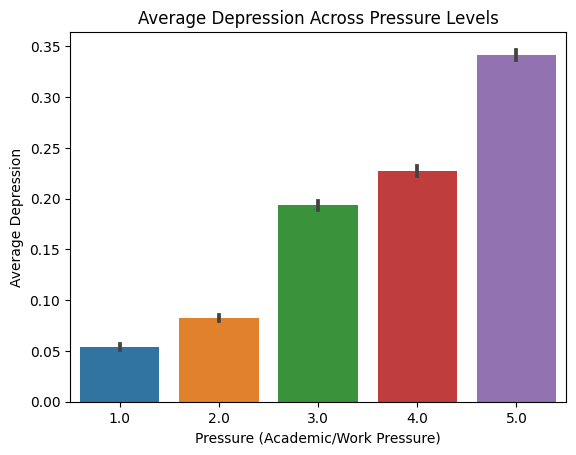

In [92]:
# Create a bar plot for Pressure across Depression categories
sns.barplot(x='Pressure', y='Depression', data=train)

# Add title and labels
plt.title('Average Depression Across Pressure Levels')
plt.xlabel('Pressure (Academic/Work Pressure)')
plt.ylabel('Average Depression')

Text(0, 0.5, 'Average Depression')

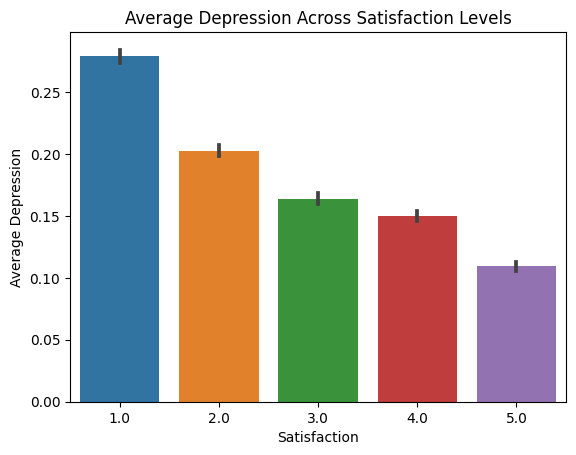

In [93]:
# Create a bar plot for Satisfaction across Depression levels
sns.barplot(x='Satisfaction', y='Depression', data=train)

# Add title and labels
plt.title('Average Depression Across Satisfaction Levels')
plt.xlabel('Satisfaction')
plt.ylabel('Average Depression')

In [94]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,8.0,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,5.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,5.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

# Preprocess data 

## Drop cols 

In [96]:
columns_to_drop = ['id', 'Name', 'Working Professional or Student', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']
train = train.drop(columns=columns_to_drop)

## Encode from catg to numerical data 


In [104]:
columns_to_encode = ['Profession', 'Gender', 'City', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
# train = pd.get_dummies(train, columns=columns_to_encode, drop_first=True) # for each category create a col 
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    label_encoders[column] = le  # Store the encoder if you need to inverse transform later

## Impute data

In [107]:
train['CGPA'].fillna(0, inplace=True)

# nan
columns_to_impute = ['Sleep Duration', 'Financial Stress', 'Pressure', 'Satisfaction']
for column in columns_to_impute:
    train[column].fillna(train[column].mean(), inplace=True)


In [102]:
train.head()

,Gender,Age,City,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,49.0,50,Chef,0.00,8.0,7,33,0,1.0,2.0,0,0,5.0,2.0
1,1,26.0,93,Teacher,0.00,5.0,20,63,1,7.0,3.0,0,1,4.0,3.0
2,1,33.0,97,Student,8.97,5.0,7,21,1,3.0,1.0,0,1,5.0,2.0
3,1,22.0,64,Teacher,0.00,5.0,15,28,1,10.0,1.0,1,1,5.0,1.0
4,0,30.0,37,Business Analyst,0.00,5.0,20,28,1,9.0,4.0,1,0,1.0,1.0


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  int64  
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  int64  
 3   Profession                             140700 non-null  int64  
 4   CGPA                                   140700 non-null  float64
 5   Sleep Duration                         140700 non-null  float64
 6   Dietary Habits                         140700 non-null  int64  
 7   Degree                                 140700 non-null  int64  
 8   Have you ever had suicidal thoughts ?  140700 non-null  int64  
 9   Work/Study Hours                       140700 non-null  float64
 10  Financial Stress                       140700 non-null  

In [109]:
train.columns[train.isnull().any()]

Index([], dtype='object')

## Preprocess test data

In [130]:
test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

# Fill missing values for 'Working Professional or Student' and 'Profession'
test["Working Professional or Student"].fillna("Student", inplace=True)
test["Profession"].fillna("Student", inplace=True)

# Combine 'Academic Pressure' and 'Work Pressure' for 'Pressure'
test["Pressure"] = test["Academic Pressure"].combine_first(test["Work Pressure"])

# Combine 'Study Satisfaction' and 'Job Satisfaction' for 'Satisfaction'
test["Satisfaction"] = test["Study Satisfaction"].combine_first(test["Job Satisfaction"])

# Convert 'Sleep Duration' to numeric (extract hours as numbers)
test["Sleep Duration"] = test["Sleep Duration"].str.extract(r'(\d+)').astype(float)

# Drop columns that were dropped in the training data
columns_to_drop = ['id', 'Name', 'Working Professional or Student', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']
test = test.drop(columns=columns_to_drop)

# Label encode the categorical columns
columns_to_encode = ['Profession', 'Gender', 'City', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

label_encoders = {}  # To store label encoders for later inverse transformation
for column in columns_to_encode:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])
    label_encoders[column] = le  # Store the encoder

# Impute NaN values for 'CGPA' with 0 (as done in training data)
test['CGPA'].fillna(0, inplace=True)

# Impute missing values for 'Sleep Duration', 'Financial Stress', 'Pressure', and 'Satisfaction' using the mean from training data
columns_to_impute = ['Sleep Duration', 'Financial Stress', 'Pressure', 'Satisfaction']
for column in columns_to_impute:
    test[column].fillna(train[column].mean(), inplace=True)

# Verify the processed test data
test.head()

,Gender,Age,City,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Id,Pressure,Satisfaction
0,1,53.0,67,27,0.00,5.0,12,53,0,9.0,3.0,1,0,2.0,5.0
1,0,58.0,25,19,0.00,5.0,12,16,0,6.0,4.0,0,1,2.0,4.0
2,1,53.0,21,56,0.00,7.0,12,12,1,12.0,4.0,0,2,4.0,1.0
3,0,23.0,47,53,6.84,8.0,12,35,1,10.0,4.0,0,3,5.0,1.0
4,1,47.0,22,56,0.00,7.0,12,28,1,3.0,4.0,0,4,5.0,5.0


# ML train

## TODO
- Use pipeline and ColumnTransformer to make it eassier to apply the algo

In [114]:
X = train.drop(columns=['Depression'])  # features
y = train['Depression']  # target

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline model, RF classf

In [115]:
# Initialize the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

# Predictions on the test set
test_predictions = rf.predict(test)

Validation Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.85      0.80      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.94      0.94      0.94     28140



# Submit 

In [135]:
test_sub = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
test_sub['Id'] = test_sub.index

In [137]:
submission = pd.DataFrame({
    'Id': test_sub['Id'],  # Replace 'Id' with your identifier column name
    'Prediction': test_predictions  # Your model's predictions
})
submission.to_csv("submission.csv", index=False)
submission

,Id,Prediction
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
93795,93795,0
93796,93796,1
93797,93797,0
93798,93798,1


# Random dice 

In [ ]:
# import numpy as np
# import pandas as pd

# # Assuming your test data has an 'Id' column
# submission = pd.DataFrame({
#     'id': test['id'],  # Replace 'Id' with the actual identifier column name in your test data
#     # 'Prediction': np.random.choice([True, False], size=len(test), p=[0.5, 0.5])  # 50% True, 50% False
#     'Prediction': True  # 50% True, 50% False
# })

# # Save the submission file
# submission.to_csv("submission.csv", index=False)